In [1]:
#pobranie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pobranie danych 
dane = pd.read_csv('energy_dataset_.csv')

In [3]:
dane.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


#### Opis zbioru danych zawierający jego wielkość i jakiego typu zmienne w nim występują
Ten zbiór danych zawiera szczegółowe informacje o różnych systemach energii odnawialnej, w tym o zainstalowanej mocy, produkcji energii, jej zużyciu, magazynowaniu, inwestycjach oraz wpływie na środowisko. Zbiór posiada następujące zmienne:

In [4]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

#### Analiza zmiennych w zbiorze danych z wykorzystaniem pakietów numpy i pandas (policzenie statystyk)

In [5]:
dane_do_stat = dane.drop(columns = ['Type_of_Renewable_Energy', 'Grid_Integration_Level', 'Funding_Sources'], axis=1)

dane_do_stat.describe().drop(['count'])

,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Initial_Investment_USD,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
mean,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.514849e+08,1.002977e+07,25234.722158,50.724179,2502.668600
std,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.432843e+08,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.091767,1030.103692,584.048006,2.200208,50.003494,1.008107e+06,5.155842e+04,100.974460,1.009712,10.000000
25%,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.259709e+08,4.963454e+06,12754.476927,26.224426,1228.000000
50%,492.907555,253216.871250,225226.374350,5054.036248,75.279702,2.539910e+08,1.002414e+07,25424.477000,50.250207,2496.000000
75%,742.254682,377083.805575,338656.214700,7536.935405,87.754318,3.759130e+08,1.507417e+07,37750.426285,75.720133,3765.000000
max,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.999407e+08,1.999855e+07,49997.578530,99.980494,4999.000000


#### Analiza zmiennych w zależności od przynależności do grupy
Mamy 3 zmienne jakościowe (wedlug nich będziemy badać przynależność do grupy):
- Type_of_Renewable_Energy
- Grid_Integration_Level
- Funding_Sources

Według zmiennej 'Type_of_Renewable_Energy' :

In [6]:
dane.drop(columns = ['Grid_Integration_Level', 'Funding_Sources'], axis=1).groupby('Type_of_Renewable_Energy').describe()

Installed_Capacity_MW                          \
                                         count        mean         std   
Type_of_Renewable_Energy                                                 
1                                       2169.0  491.733481  288.582064   
2                                       2202.0  494.403693  290.527630   
3                                       2157.0  507.321986  292.965169   
4                                       2105.0  491.657492  283.643091   
5                                       2150.0  495.431083  289.263356   
6                                       2124.0  497.964670  286.942621   
7                                       2093.0  492.356917  285.280165   

                                                                        \
                               min         25%         50%         75%   
Type_of_Renewable_Energy                                                 
1                         1.826727  239.429139  489.317702  739.099683   
2                         1.742193  250.491737  480.157653  747.054791   
3                         1.095233  255.617176  511.149822  762.840937   
4                         1.364127  247.387911  480.629722  726.362578   
5                         1.263246  241.108894  494.222463  741.075090   
6                         1.091767  254.893313  491.434513  743.494840   
7                         1.954659  240.267829  500.643407  735.127651   

                                     Energy_Production_MWh                 \
                                 max                 count           mean   
Type_of_Renewable_Energy                                                    
1                         999.733688                2169.0  252813.675988   
2                         999.021100                2202.0  250384.797558   
3                         999.909635                2157.0  251070.361751   
4                         999.908242                2105.0  252893.832742   
5                         999.909237                2150.0  252599.445246   
6                         999.977081                2124.0  254210.857269   
7                         999.982979                2093.0  252571.041821   

                          ... Air_Pollution_Reduction_Index             \
                          ...                           75%        max   
Type_of_Renewable_Energy  ...                                            
1                         ...                     75.594122  99.980494   
2                         ...                     75.150004  99.973835   
3                         ...                     75.798888  99.958849   
4                         ...                     76.581489  99.962934   
5                         ...                     75.871020  99.950241   
6                         ...                     75.226587  99.896014   
7                         ...                     75.568800  99.878638   

                         Jobs_Created                                  \
                                count         mean          std   min   
Type_of_Renewable_Energy                                                
1                              2169.0  2490.255417  1457.614206  10.0   
2                              2202.0  2511.432334  1459.875472  12.0   
3                              2157.0  2510.081595  1438.654485  11.0   
4                              2105.0  2488.813302  1447.361174  10.0   
5                              2150.0  2512.946977  1442.774780  10.0   
6                              2124.0  2520.220339  1450.667282  14.0   
7                              2093.0  2484.237458  1462.975473  14.0   

                                                            
                              25%     50%      75%     max  
Type_of_Renewable_Energy                                    
1                         1221.00  2486.0  3767.00  4999.0  
2                         1224.00  2496.0  3806.75  4999

Według zmiennej 'Grid_Integration_Level' :

In [7]:
dane.drop(columns = ['Type_of_Renewable_Energy', 'Funding_Sources'], axis=1).groupby('Grid_Integration_Level').describe()

Installed_Capacity_MW                          \
                                       count        mean         std   
Grid_Integration_Level                                                 
1                                     3802.0  499.686652  288.447678   
2                                     3663.0  498.132302  289.508126   
3                                     3749.0  493.717107  285.130643   
4                                     3786.0  491.923799  289.797678   

                                                                      \
                             min         25%         50%         75%   
Grid_Integration_Level                                                 
1                       1.721435  253.532389  496.880773  749.754664   
2                       1.091767  243.185570  496.188903  741.368156   
3                       1.095233  245.471128  493.095095  733.054201   
4                       1.133071  241.588904  485.443300  745.151799   

                                   Energy_Production_MWh                 ...  \
                               max                 count           mean  ...   
Grid_Integration_Level                                                   ...   
1                       999.909237                3802.0  252486.153475  ...   
2                       999.909635                3663.0  251284.958035  ...   
3                       999.982979                3749.0  255692.161595  ...   
4                       999.908242                3786.0  249937.998862  ...   

                       Air_Pollution_Reduction_Index            Jobs_Created  \
                                                 75%        max        count   
Grid_Integration_Level                                                         
1                                          75.634851  99.973835       3802.0   
2                                          75.997363  99.870582       3663.0   
3                                          75.078261  99.980494       3749.0   
4                                          76.014058  99.958849       3786.0   

                                                                        \
                               mean          std   min     25%     50%   
Grid_Integration_Level                                                   
1                       2496.993688  1450.052244  10.0  1244.0  2473.0   
2                       2503.874693  1445.859627  10.0  1231.0  2478.0   
3                       2512.230195  1463.357999  10.0  1225.0  2508.0   
4                       2497.732435  1445.984578  12.0  1206.0  2523.0   

                                         
                            75%     max  
Grid_Integration_Level                   
1                       3755.00  4999.0  
2                       3761.00  4999.0  
3                       3804.00  4998.0  
4                       3739.75  4999.0  

[4 rows x 80 columns]

Według zmiennej 'Funding_Sources' :

In [8]:
dane.drop(columns = ['Type_of_Renewable_Energy','Grid_Integration_Level'], axis=1).groupby('Funding_Sources').describe()

Installed_Capacity_MW                                    \
                                count        mean         std       min   
Funding_Sources                                                           
1                              4982.0  497.473861  288.468422  1.515102   
2                              4976.0  494.120022  289.165826  1.095233   
3                              5042.0  495.969894  287.063431  1.091767   

                                                                 \
                        25%         50%         75%         max   
Funding_Sources                                                   
1                242.764410  498.646365  740.336305  999.908242   
2                244.537539  490.653665  743.797329  999.977081   
3                249.457021  489.851393  742.324118  999.982979   

                Energy_Production_MWh                 ...  \
                                count           mean  ...   
Funding_Sources                                       ...   
1                              4982.0  254711.384681  ...   
2                              4976.0  251445.066043  ...   
3                              5042.0  250912.647203  ...   

                Air_Pollution_Reduction_Index            Jobs_Created  \
                                          75%        max        count   
Funding_Sources                                                         
1                                   76.555510  99.896014       4982.0   
2                                   75.223069  99.978225       4976.0   
3                                   75.277565  99.980494       5042.0   

                                                                           \
                        mean          std   min      25%     50%      75%   
Funding_Sources                                                             
1                2466.941389  1449.781628  12.0  1182.00  2462.5  3737.00   
2                2530.704582  1463.819153  10.0  1229.00  2543.5  3814.00   
3                2510.301666  1439.650271  10.0  1274.75  2488.5  3751.75   

                         
                    max  
Funding_Sources          
1                4999.0  
2                4999.0  
3                4999.0  

[3 rows x 80 columns]

#### Wykresy analizujące rozkład zmiennych w zbiorze danych razem z wnioskami

##### Wykres nr 1

<Figure size 1200x800 with 0 Axes>

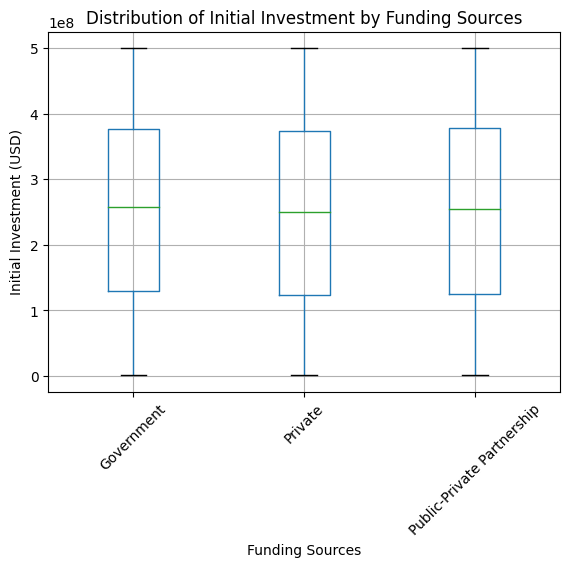

In [61]:
dane_do_wykresu = dane.loc[:,['Initial_Investment_USD', 'Funding_Sources']]

plt.figure(figsize=(12, 8))

boxplot = dane_do_wykresu.boxplot(column='Initial_Investment_USD', by='Funding_Sources', grid=True)


plt.xlabel('Funding Sources')
plt.ylabel('Initial Investment (USD)')
plt.title('Distribution of Initial Investment by Funding Sources')
plt.suptitle('')
plt.xticks(ticks=[1, 2, 3], labels=['Government', 'Private', 'Public-Private Partnership'])
plt.xticks(rotation=45)

plt.show()

##### Wykres nr 2

<Figure size 1200x800 with 0 Axes>

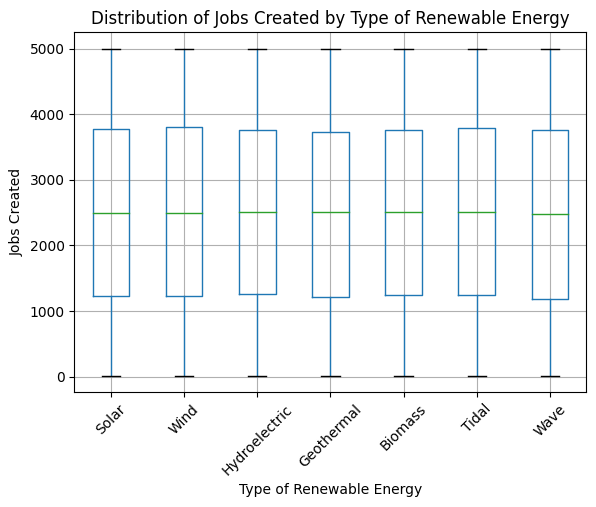

In [58]:
dane_do_wykresu = dane.loc[:, ['Jobs_Created', 'Type_of_Renewable_Energy']]

plt.figure(figsize=(12, 8))

boxplot = dane_do_wykresu.boxplot(column='Jobs_Created', by='Type_of_Renewable_Energy', grid=True)

plt.xlabel('Type of Renewable Energy')
plt.ylabel('Jobs Created')
plt.title('Distribution of Jobs Created by Type of Renewable Energy')
plt.suptitle('')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=['Solar', 'Wind', 'Hydroelectric', 'Geothermal', 'Biomass', 'Tidal', 'Wave'], rotation=45)

plt.show()

###### Wnioski
Dane cechy w zależności od zmiennej jakościowej mają bardzo zbliżone rozkłady, wręcz identyczne

#### Wykresy wskazujące zależności w zbiorze danych z wnioskami

##### Wykres 1

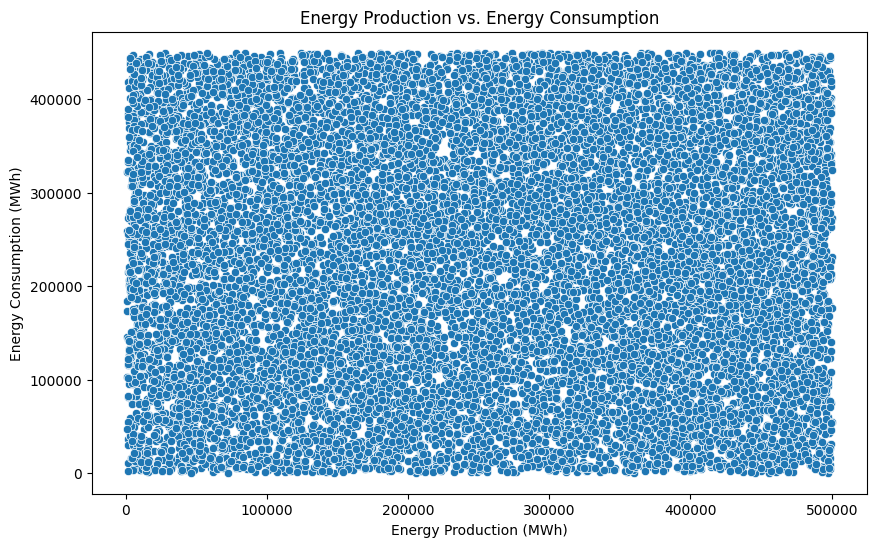

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dane, x='Energy_Production_MWh', y='Energy_Consumption_MWh')

plt.xlabel('Energy Production (MWh)')
plt.ylabel('Energy Consumption (MWh)')
plt.title('Energy Production vs. Energy Consumption')

plt.show()


##### Wykres 2

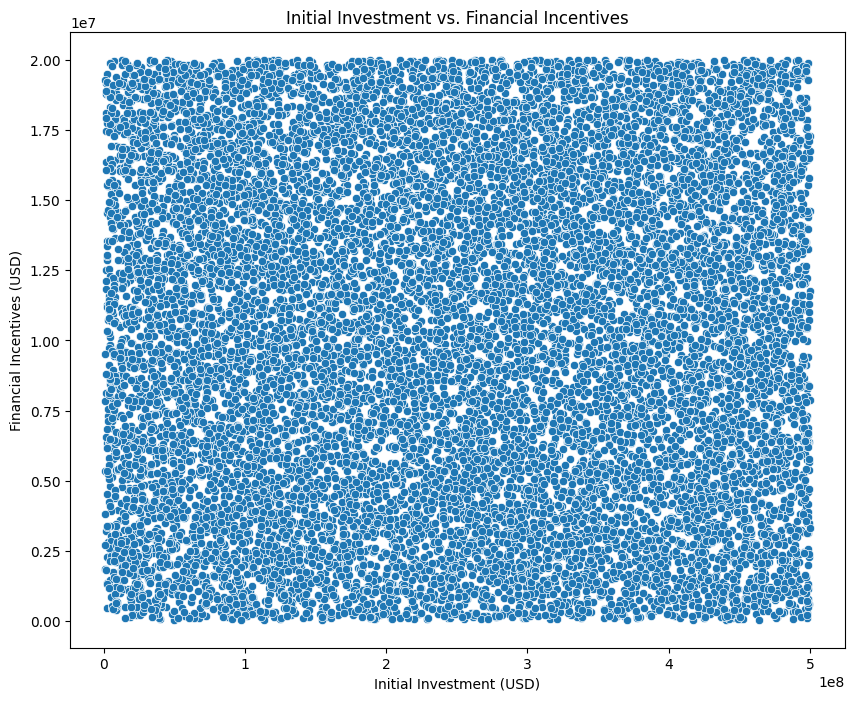

In [85]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dane, x='Initial_Investment_USD', y='Financial_Incentives_USD')

plt.xlabel('Initial Investment (USD)')
plt.ylabel('Financial Incentives (USD)')
plt.title('Initial Investment vs. Financial Incentives')

plt.show()


Trudno dostrzec zależnosci, można wręcz pokusić się o stwierdzenie, że te dane wyglądają jak generator liczb pseudolosowych z rozkładu jednostajnego o czym poniżej.

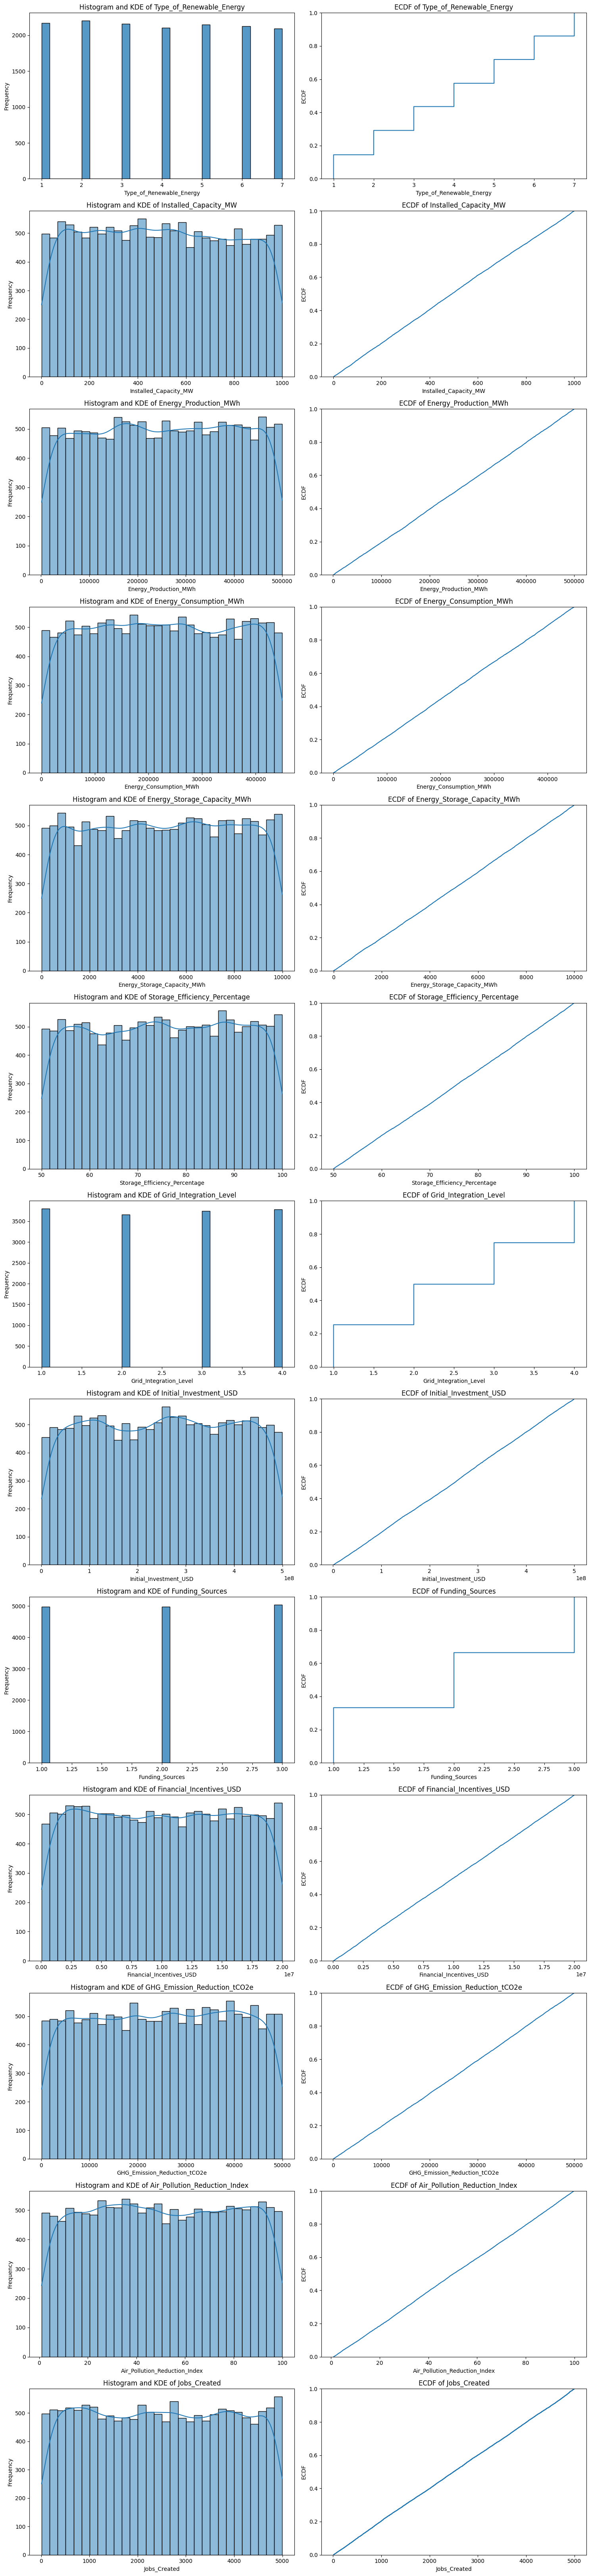

In [5]:
categorical_columns = ['Type_of_Renewable_Energy', 'Grid_Integration_Level', 'Funding_Sources']
num_columns = len(dane.columns)

fig, axs = plt.subplots(num_columns, 2, figsize=(15, num_columns * 5))

for i, column in enumerate(dane.columns):
    if column in categorical_columns:
        sns.histplot(dane[column], bins=30, ax=axs[i, 0], kde=False)
    else:
        sns.histplot(dane[column], bins=30, kde=True, ax=axs[i, 0])

    axs[i, 0].set_title(f'Histogram and KDE of {column}')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Frequency')
    
    sns.ecdfplot(dane[column], ax=axs[i, 1])
    axs[i, 1].set_title(f'ECDF of {column}')
    axs[i, 1].set_xlabel(column)
    axs[i, 1].set_ylabel('ECDF')

plt.tight_layout()
plt.show()


##### Wnioski na temat datasetu

Na podstawie analizy powyższych wykresów odnoszę wrażenie, że zbiór mogł być generowany na podstawie następującego psuedokodu:

for obserwacja w zbiorze:


 zmienna_jakościowa = int((randuni(a,b))) #gdzie a i b to dobrane parametry
 
 
 zmienna_numeryczna = randuni((c,d) #gdzie c i d to dobrane parametry
 
 
end

Przez co zależności w tym zbiorze nie występują.